In [1]:
# This is the Boss class. This one contains the attributes [name, attitude, behaviour, face]
# and the methods get_attitude, get_behaviour, get_face which will return each of the attributes

class Boss(object):
    def __init__(self, name, attitude, behaviour, face):
        self.name = name
        self.attitude = attitude
        self.behaviour = behaviour
        self.face = face

    def get_attitude(self):
        return self.attitude

    def get_behaviour(self):
        return self.behaviour

    def get_face(self):
        return self.face

boss = Boss("Julian", "Positive", "Social", "Smiling")
boss.get_attitude()


'Positive'

In [2]:
boss.attitude

'Positive'

In [5]:
# Classe GoodBoss héritée de Boss
class GoodBoss(Boss):
    def __init__(self, name, attitude, behaviour, face, experience):
        super().__init__(name, attitude, behaviour, face)
        self.experience = experience

    def nurture_talent(self):
        return "The employees feel all warm and fuzzy then put their talents to good use."

    def encourage(self):
        return "The team cheers, starts shouting awesome slogans then gets back to work."


# Exemple d'utilisation de la classe GoodBoss
michel = GoodBoss("Michel", "Positive", "Funny", "Happy", 5)

print(
    f"{michel.name}'s Behaviour: {michel.get_behaviour()}\n"
    f"How does {michel.name} nurture talents: {michel.nurture_talent()}"
)


# Classe BadBoss héritée de Boss
class BadBoss(Boss):
  def __init__(self, name, attitude, behaviour, face):
        super().__init__(name, attitude, behaviour, face)

  def hoard_praise(self):
        return "The employees feel cheated and start plotting Bob's demise while he stares at his own reflection."

  def yell(self):
        return f"Everyone stares while {self.name} yells."


# Exemple d'utilisation de la classe BadBoss
bob = BadBoss("Bob", "Crazy", "Anti-Social", "Scowl of Hate")
print(bob.yell())

Michel's Behaviour: Funny
How does Michel nurture talents: The employees feel all warm and fuzzy then put their talents to good use.
Everyone stares while Bob yells.


# Compose Layers

In [7]:
import tensorflow as tf

my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1, 1), input_shape=(None, None, 3)),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(2, 1,padding='same'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(3, (1, 1)),
                             tf.keras.layers.BatchNormalization()])

my_seq(tf.zeros([1, 2, 3, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [8]:
inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [9]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super().__init__()

    filter1, filter2, filter3 = filters # filters = interable (filter1,filter2,filter3), [filter1,filter2,filter3]

    self.conv2a = tf.keras.layers.Conv2D(filters = filter1,kernel_size= kernel_size, padding="same")
    self.bn2a = tf.keras.layers.BatchNormalization()

    self.conv2b = tf.keras.layers.Conv2D(filter2, kernel_size, padding="same")
    self.bn2b = tf.keras.layers.BatchNormalization()

    self.conv2c = tf.keras.layers.Conv2D(filter3, kernel_size, padding="same")
    self.bn2c = tf.keras.layers.BatchNormalization()

  def call(self, input_tensor, training=False):

    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)

    x = self.conv2c(x)
    x = self.bn2c(x, training=training)
    x = tf.nn.relu(x)

    x += input_tensor

    return x


block = ResnetIdentityBlock(2, [1,2,3])
block(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [10]:
model_ = tf.keras.Sequential([ResnetIdentityBlock(2, [1,2,3]) for i in range(10)])

In [11]:
model_(tf.zeros([1, 2, 3, 3]))

<tf.Tensor: shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

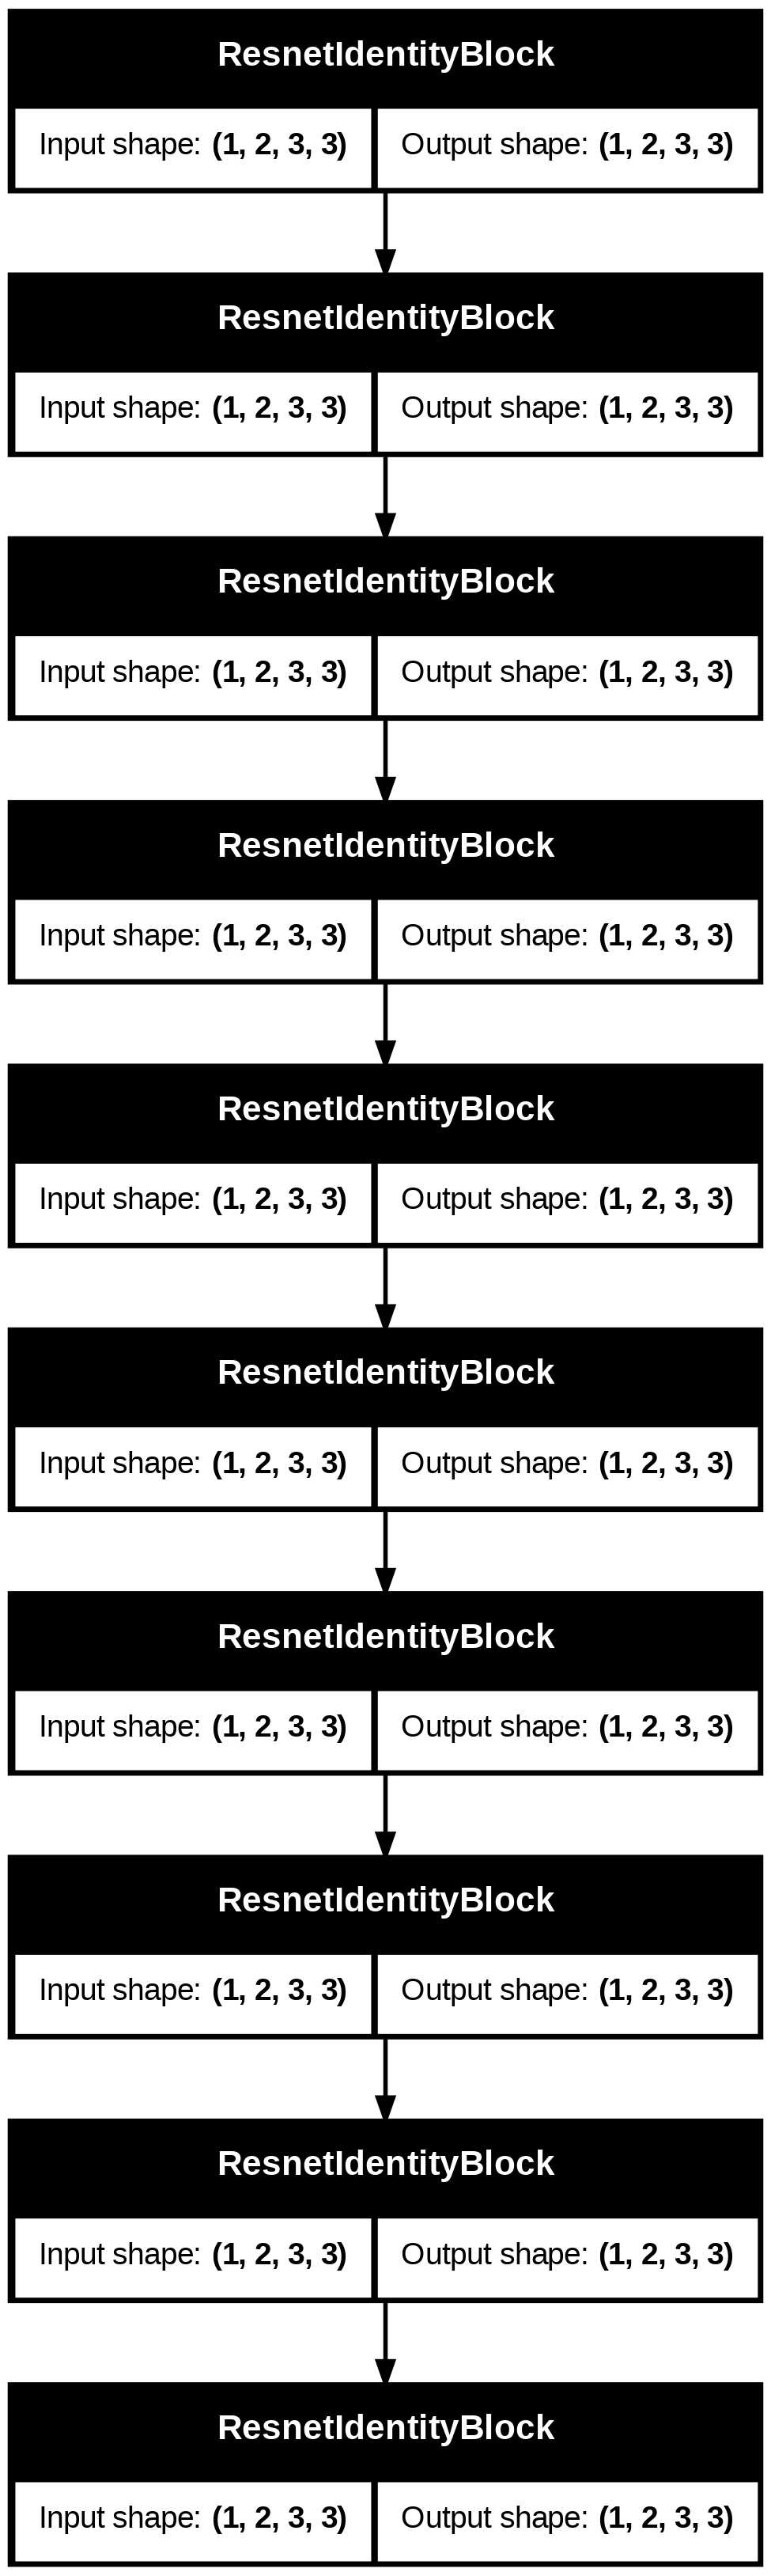

In [12]:
tf.keras.utils.plot_model(model_, show_shapes=True)